<a href="https://colab.research.google.com/github/candiceevemiller/self-driving-cars/blob/main/optical_flow_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open('gdrive/MyDrive/self-driving-cars/data/train/optical_flow_images.npy', 'rb') as f:
    optical_flow_images = np.load(f)

targets = np.fromfile('gdrive/MyDrive/self-driving-cars/data/train/train.txt', sep='\n')
targets = targets[1:]
print(targets.shape)
print(optical_flow_images.shape)

(20399,)
(20399, 200, 640, 3)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x/255),
    tf.keras.layers.Conv2D(24, (5, 5), strides=(2, 2), padding='same', input_shape = (200,640,3), activation='relu'),
    tf.keras.layers.Conv2D(36, (5, 5), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=root_mean_squared_error)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20

history = model.fit(optical_flow_images, targets, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=.3, shuffle=True)

Epoch 1/20
447/447 [==============================] - 48s 84ms/step - loss: 29.3780 - root_mean_squared_error: 3.7984 - val_loss: 41.4888 - val_root_mean_squared_error: 5.6093
Epoch 2/20
447/447 [==============================] - 35s 78ms/step - loss: 9.4033 - root_mean_squared_error: 2.3178 - val_loss: 24.9945 - val_root_mean_squared_error: 4.1487
Epoch 3/20
447/447 [==============================] - 35s 77ms/step - loss: 6.3448 - root_mean_squared_error: 1.9039 - val_loss: 30.4493 - val_root_mean_squared_error: 4.6268
Epoch 4/20
447/447 [==============================] - 34s 77ms/step - loss: 4.7534 - root_mean_squared_error: 1.6375 - val_loss: 27.2826 - val_root_mean_squared_error: 4.4458
Epoch 5/20
447/447 [==============================] - 34s 77ms/step - loss: 4.1380 - root_mean_squared_error: 1.5084 - val_loss: 24.5618 - val_root_mean_squared_error: 4.1598
Epoch 6/20
447/447 [==============================] - 35s 77ms/step - loss: 3.4920 - root_mean_squared_error: 1.3862 - val_l

In [ ]:
def plot_history(history):
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title('model accuracy')
    plt.ylabel('rmse')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
plot_history(history)

In [ ]:
plt.plot(targets)

In [ ]:
model.save_weights('gdrive/MyDrive/self-driving-cars/checkpoints/my_checkpoint')

In [ ]:
model.load_weights('gdrive/MyDrive/self-driving-cars/checkpoints/my_checkpoint')

In [ ]:
predictions = model.predict(optical_flow_images)

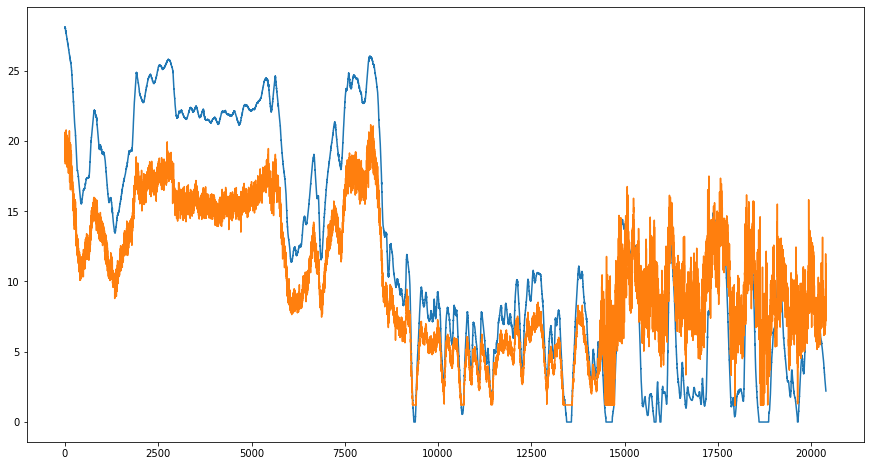

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(targets)
plt.plot(predictions)
plt.show()